In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)
%matplotlib inline

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
import matplotlib.cm as cm

In [2]:
df = pd.read_pickle('/Users/huiru/GADataScience/FinalProject/Data/kmeansready.pkl')
scaleddf = pd.read_pickle('/Users/huiru/GADataScience/FinalProject/Data/kmeansscaled.pkl')

In [109]:
# df.dtypes

In [3]:
# infocols = ['poet_name','poet_url','poet_poems_url','poet_bio','city','state','country','primary_tag','tags','tag2','tag3','tag4','poem_yrpub']
poemcols = ['poem_link', 'poem_title', 'title_clean','poem_text', 'sentences_x']
outcome = ['label', 'strlabel', 'poet_name', 'primary_tag', 'poem_link', 'text']

#EXCLUDE wordcount, wordcount_d
numerical = ['yrpub', 'numlines','numstanzas' ,'avgline_stanza','enj_score','ttr',
             'abstraction_score', 'lesk_abs_score', 'pronoun_score', 'title_lesk_abs', 'conjunction_ratio',
             'nps_ratio','vps_ratio','aps_ratio','avg_nps_cscore','avg_vps_cscore','avg_aps_cscore',
             '1w_nps_fr','2w_nps_fr','3w_nps_fr']

In [4]:
kdf = df[numerical]
odf = df[outcome]
s_kdf = scaleddf[numerical]
s_odf = scaleddf[outcome]

In [5]:
len(df)
len(scaleddf)
kdf.columns

Index([u'yrpub', u'numlines', u'numstanzas', u'avgline_stanza', u'enj_score',
       u'ttr', u'abstraction_score', u'lesk_abs_score', u'pronoun_score',
       u'title_lesk_abs', u'conjunction_ratio', u'nps_ratio', u'vps_ratio',
       u'aps_ratio', u'avg_nps_cscore', u'avg_vps_cscore', u'avg_aps_cscore',
       u'1w_nps_fr', u'2w_nps_fr', u'3w_nps_fr'],
      dtype='object')

In [36]:
X = kdf[numerical[3:]]
for k in xrange(2,12):
    km = KMeans(n_clusters=k, init = 'k-means++', random_state=1)
    km.fit(X)
    labels = km.labels_
    print k, metrics.silhouette_score(X, labels, metric='euclidean')

2 0.755305993357
3 0.687597020504
4 0.671397689884
5 0.510597918254
6 0.518624268032
7 0.504753037032
8 0.5315306773
9 0.521361306404
10 0.453601238091
11 0.514115547969


In [39]:
X_s = s_kdf[numerical[3:]]
len(X_s)
for k in xrange(2,12):
    km = KMeans(n_clusters=k,init ='k-means++', random_state=1)
    km.fit(X_s)
    labels = km.labels_
    print k, metrics.silhouette_score(X_s, labels, metric='euclidean')

2 0.117332033656
3 0.121908935125
4 0.0787932373621
5 0.0842256964509
6 0.0836460951287
7 0.0764069214389
8 0.0759383593969
9 0.0755686359233
10 0.0734622772828
11 0.0750225755703


# DID I DO PREPROCESSING WRONG? 
##or is it that there's no inherent structure within 
##the data ?^ would appear so.

In [40]:
type(X)
##change to array for plotting
Xx = X.as_matrix()

('For n_clusters =', 2, 'The average silhouette_score is :', 0.75530599335704451)


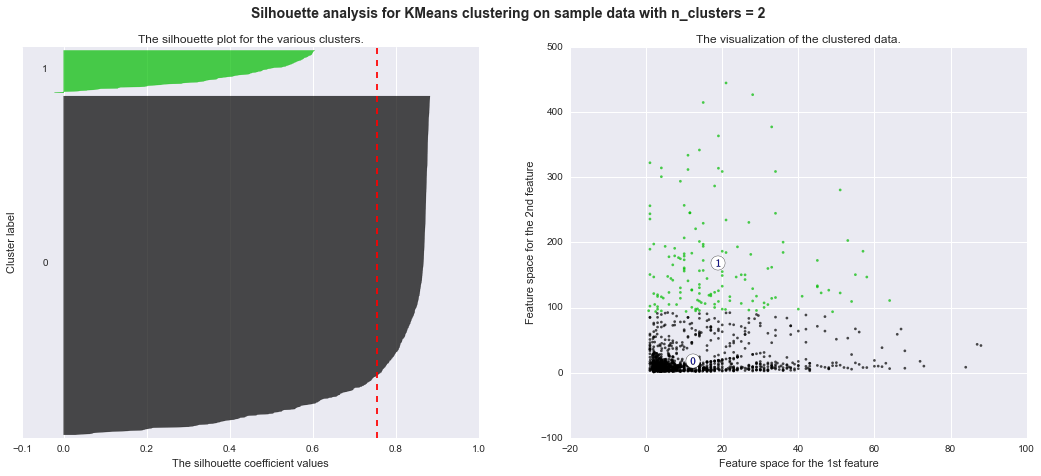

('For n_clusters =', 3, 'The average silhouette_score is :', 0.68759702050405125)


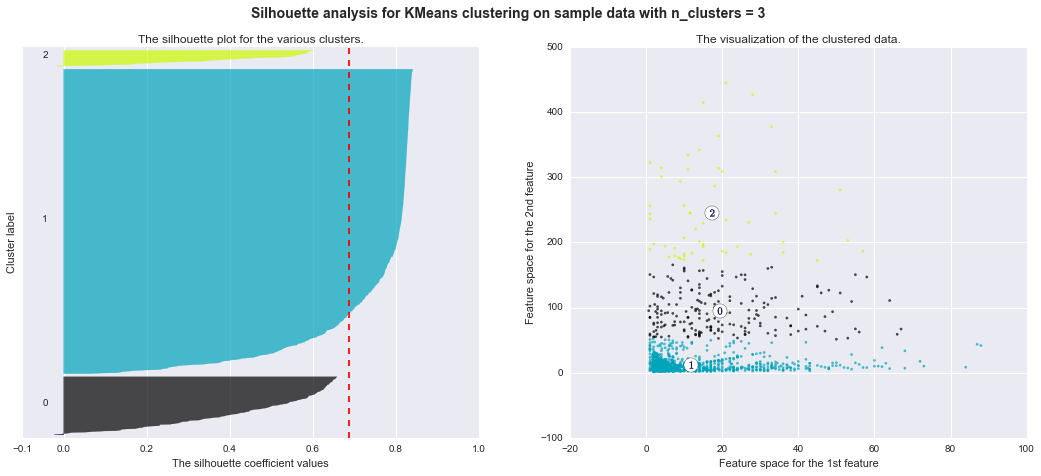

In [41]:
range_n_clusters = [2, 3]
#                     , 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Xx) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(Xx)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(Xx, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(Xx, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Xx[:, 0], Xx[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [42]:
# km = KMeans(n_clusters=2,  init='random', n_init=1 , max_iter = 100, random_state=1)
km = KMeans(n_clusters=2, init='k-means++', n_init=1 , max_iter = 300, random_state=1)
Y_hat = km.fit(X).labels_
centroids = km.cluster_centers_
y = km.predict(X)
metrics.silhouette_score(X, Y_hat, metric='euclidean')

0.75530599335704451

## lets test the stability of our Kmeans

In [44]:
def shuffle_dataframe(df):
    df2 = df.reindex(np.random.permutation(df.index))
    return df2

In [46]:
scores = []
for i in range(0,10):
    X = shuffle_dataframe(kdf[numerical[3:]])
    km = KMeans(n_clusters=2, init='k-means++', n_init=1 , max_iter = 300, random_state=1)
    Y_hat = km.fit(X).labels_
    # centroids = km.cluster_centers_
    # y = km.predict(X)
    sc = metrics.silhouette_score(X, Y_hat, metric='euclidean')
    print sc
    scores.append(sc)

# scores = np.array(scores)
print "\n"+str(np.var(scores))

0.755305993357
0.755305993357
0.755305993357
0.755305993357
0.755305993357
0.755305993357
0.755305993357
0.755305993357
0.755305993357
0.755305993357

0.0


In [47]:
X = kdf[numerical[3:]]
km = KMeans(n_clusters=2, init='k-means++', n_init=1 , max_iter = 300, random_state=1)
Y_hat = km.fit(X).labels_
centroids = km.cluster_centers_
y = km.predict(X)

In [48]:
# centroids = km.cluster_centers_
# centroids
# n = km.labels_
# n = pd.DataFrame(n)
y = pd.DataFrame(y)
y.columns = ['km']

In [50]:
len(odf)
td1 = pd.concat([df[numerical[3:]], y], axis = 1).sort('km', ascending = False)

In [51]:
td = td1.groupby('km').mean().transpose()
print td
# print len(td1.query('km == 0 and label ==1'))
# print len(td1.query('km == 0 and label ==0'))
# print len(td1.query('km == 1 and label ==1'))
# print len(td1.query('km == 1 and label ==0'))

km                         0           1
avgline_stanza     12.408714   18.788938
enj_score          17.538412  168.182743
ttr                 0.691225    0.728873
abstraction_score   1.282591    1.284238
lesk_abs_score      1.149193    1.160600
pronoun_score       0.382503    0.431686
title_lesk_abs      1.240077    1.232526
conjunction_ratio   5.304368    5.236365
nps_ratio           0.522547    0.522280
vps_ratio           0.338564    0.329023
aps_ratio           0.138889    0.148697
avg_nps_cscore      1.538083    1.566985
avg_vps_cscore      1.993940    2.005049
avg_aps_cscore      1.177951    1.166097
1w_nps_fr           0.615495    0.598470
2w_nps_fr           0.256759    0.258178
3w_nps_fr           0.110424    0.124274


#Let's try visually looking at the centroids

In [52]:
# td1.columns
# centroids
centroids = pd.DataFrame(centroids, columns=numerical[3:])
centroids
centroids["km"] = ["0 centroid", "1 centroid"]
# full_ds = pd.concat([ds[numerical[:5]], centroids], ignore_index=True)

In [53]:
full_ds = pd.concat([td1, centroids], ignore_index=True)

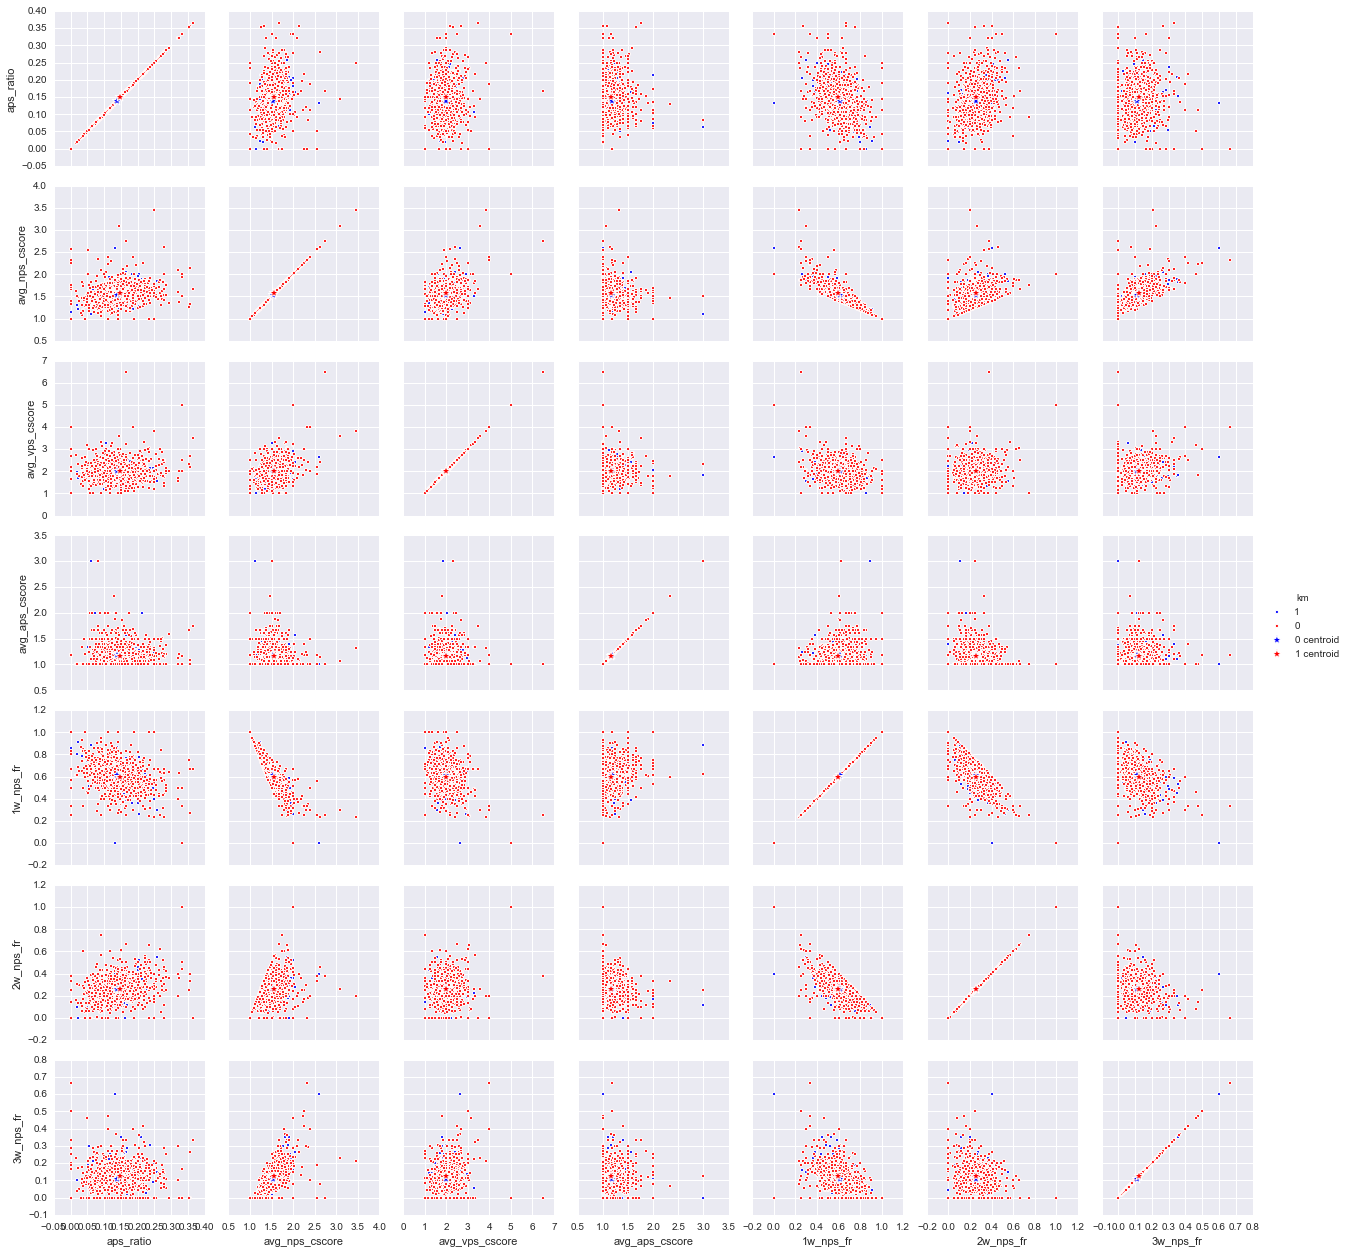

In [58]:
g = sns.PairGrid(full_ds.ix[:,10:], hue="km",
#                  hue_order=["0", "1", "0 centroid", "1 centroid"],
                 palette=["b", "r", "b", "r"],
                 hue_kws={"s": [10, 10, 100, 100],
                          "marker": ["o", "o", "*", "*"]}
                )
g.map(plt.scatter, linewidth=1, edgecolor="w")
g.add_legend()

In [87]:
len(full_ds)

fdf = pd.concat([full_ds, df[outcome]], axis = 1)

len(fdf)

1289

In [88]:
fdf.groupby("km").agg({"primary_tag": pd.Series.nunique})

,primary_tag
km,
0,19
1,5
0 centroid,0
1 centroid,0


In [89]:
fdf.query("km == 1")['primary_tag'].value_counts()

Surrealism         49
NewYorkSchool      44
Objectivists       27
Contemporary       23
Slam/SpokenWord     1
dtype: int64

In [90]:
fdf.query("km == 0")['primary_tag'].value_counts()

Contemporary               642
Modernism                  108
LanguagePoetry              55
Imagism                     52
ConfessionalPoetry          46
JazzPoetry                  37
Symbolists                  35
HarlemRenaissance           33
Beat                        29
BlackMountain               22
ConcretePoetry              16
NewYorkSchool               16
DarkRoomCollective          15
BlackArts                   14
ConceptualPoetry             9
SanFranciscoRenaissance      7
Surrealism                   4
Slam/SpokenWord              2
Objectivists                 1
dtype: int64

#Validation
## Benchmarking against external classification

In [125]:
true_neg = len(fdf.query("km == 0 and label == 1")[['label', 'km']])
true_pos = len(fdf.query("km == 1 and label == 0")[['label', 'km']])
false_neg = len(fdf.query("km == 0 and label == 0")[['label', 'km']])
false_pos = len(fdf.query("km == 1 and label == 1")[['label', 'km']])

In [126]:
print '\t\t','Y','  ','N','\n\n','Predicted yes\t', true_pos, false_pos, '\nPredicted No\t',true_neg, false_neg

		Y    N 

Predicted yes	94 50 
Predicted No	643 500


In [127]:
Accuracy = (true_pos+true_neg)/float(len(fdf))
Accuracy

0.5717610550814585

##Are the clusters something different????

In [144]:
f = pd.DataFrame(fdf.query("km == 0")['poet_name'].value_counts(), columns =  ['num_0'])
nf = pd.DataFrame(fdf.query("km == 1")['poet_name'].value_counts(), columns = ['num_1'])

In [153]:
len(fdf.poet_name.value_counts())

fnf = pd.merge(f, nf, how='outer', on=None, left_index=True, right_index=True)

In [155]:
fnf.fillna(0, inplace = True)

In [157]:
fnf.query('num_0 > 0 and num_1 > 0')

,num_0,num_1
Joshua Beckman,1,7


In [158]:
fnf.query('num_0 == 0 and num_1 > 0')

,num_0,num_1
A. R. Ammons,0,6
Aimé Césaire,0,2
Alice Notley,0,11
Ana Božičević,0,2
André Breton,0,3
Barbara Guest,0,6
Brett Fletcher Lauer,0,1
Catherine Anderson,0,1
Charles Reznikoff,0,7
Charles Simic,0,14


In [159]:
fnf.query('num_0 > 0 and num_1 == 0')

,num_0,num_1
Ai,2,0
Ada Limón,4,0
Adam Zagajewski,3,0
Adrienne Rich,2,0
Afaa Michael Weaver,5,0
Aimee Nezhukumatathil,2,0
Alan Dugan,2,0
Alan Shapiro,4,0
Albert Goldbarth,6,0
Ali Liebegott,1,0


#BINGO MAYBE?

In [195]:
ex1 = df.query('poet_name == "Alice Notley"')
ex2 = df.query('poet_name == "Stephen Dunn"')

In [196]:
ex1.reset_index(drop = True, inplace = True)

In [199]:
ex1.text[1]

["I'm calling out from pictures to your vision creating it",
 'turn right, that dream building cutglass window in door.',
 "Automatically inside their apartment, you don't have",
 'to get there. This is before the lost sacred corpus vision,',
 'someone says Look at my author photo. I',
 "don't really want to I'm turning to defiant metal",
 'not a dream part, can you see it where the movement of',
 'images turns back towards me I want a',
 "different, how I'm portrayed because you can't",
 'see me, visage. Look at me please. The soul is so thick',
 "larger than the portrait what you'd call madonnaesque,",
 'and then there was more hoax a view as I am',
 'the rose here. And you never wanted to be that, did I?',
 'I was waiting to see what I would be. Blackness',
 'eats you but your soul eats it without your knowing that',
 'figure, because it is causing your appearance to the world.',
 'They arrange me in clothes of Easter, or of',
 "the first day of classes, but I'm projecting pigment",

In [200]:
ex1[numerical]

,yrpub,numlines,numstanzas,avgline_stanza,enj_score,ttr,abstraction_score,lesk_abs_score,pronoun_score,title_lesk_abs,conjunction_ratio,nps_ratio,vps_ratio,aps_ratio,avg_nps_cscore,avg_vps_cscore,avg_aps_cscore,1w_nps_fr,2w_nps_fr,3w_nps_fr
0,2011,8,4,2.000000,54.960000,0.612040,1.437309,1.271739,0.160000,1.277778,1.160000,0.356522,0.504348,0.139130,1.317073,1.655172,1.187500,0.707317,0.268293,0.024390
1,2013,25,1,25.000000,106.333333,0.643478,1.415857,1.388889,0.250000,1.166667,2.416667,0.477273,0.420455,0.102273,1.571429,1.810811,1.111111,0.571429,0.309524,0.095238
2,1992,20,5,4.000000,20.000000,0.689320,1.196236,1.091837,4.000000,1.136364,28.000000,0.500000,0.318182,0.181818,1.272727,1.250000,1.062500,0.772727,0.181818,0.045455
3,1992,17,5,3.400000,17.000000,0.621762,1.309538,1.236111,2.000000,1.076923,35.000000,0.405063,0.379747,0.215190,1.281250,1.300000,1.058824,0.718750,0.281250,0.000000
4,1992,19,5,3.800000,15.833333,0.684211,1.272772,1.131579,0.333333,1.060000,5.333333,0.383721,0.337209,0.279070,1.424242,1.344828,1.208333,0.636364,0.303030,0.060606
5,1992,15,4,3.750000,7.500000,0.720779,1.025260,1.035088,1.500000,1.057692,13.500000,0.469697,0.363636,0.166667,1.483871,1.583333,1.181818,0.612903,0.290323,0.096774
6,2006,22,1,22.000000,5.500000,0.736842,1.189732,1.156250,0.000000,1.388889,5.250000,0.565217,0.282609,0.152174,1.653846,2.692308,1.857143,0.615385,0.115385,0.269231
7,2006,17,6,2.833333,5.000000,0.714286,1.687500,1.538462,0.666667,1.333333,4.000000,0.440000,0.480000,0.080000,1.545455,1.750000,1.000000,0.545455,0.363636,0.090909
8,2008,17,4,4.250000,17.000000,0.611570,1.359022,1.309524,3.000000,0.875000,27.000000,0.348837,0.488372,0.162791,1.666667,1.904762,1.142857,0.600000,0.200000,0.133333
9,2008,19,1,19.000000,11.818182,0.776000,1.319017,1.350000,0.272727,0.875000,1.545455,0.387755,0.469388,0.142857,1.368421,1.956522,1.714286,0.736842,0.210526,0.000000
